In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_log = pd.read_csv('train_preliminary/click_log.csv')
df_log.head()

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1


In [3]:
df_log.shape

(30082771, 4)

In [6]:
df_log.isnull().sum()

time           0
user_id        0
creative_id    0
click_times    0
dtype: int64

In [7]:
df_log.max()

time                91
user_id         900000
creative_id    4445718
click_times        152
dtype: int64

In [8]:
df_log.click_times.value_counts()

1      28426543
2       1507449
3         90356
4         43047
5          7507
6          3512
7          1529
8          1486
9           452
10          270
11          172
12          116
13           76
14           62
15           36
16           34
17           22
18           21
21           17
20           13
19           10
22            5
23            4
26            3
32            3
27            3
30            3
24            3
25            2
29            2
33            2
37            2
28            1
67            1
34            1
35            1
36            1
43            1
44            1
50            1
152           1
Name: click_times, dtype: int64

In [9]:
df_user = pd.read_csv('train_preliminary/user.csv')
df_user.head()

,user_id,age,gender
0,1,4,1
1,2,10,1
2,3,7,2
3,4,5,1
4,5,4,1


In [10]:
print(df_user.shape)
df_user.isnull().sum()

(900000, 3)


user_id    0
age        0
gender     0
dtype: int64

In [11]:
df_user.age.value_counts(), df_user.gender.value_counts()

(3     202909
 4     150578
 2     149271
 5     130667
 6     101720
 7      66711
 1      35195
 8      31967
 9      19474
 10     11508
 Name: age, dtype: int64, 1    602610
 2    297390
 Name: gender, dtype: int64)

In [12]:
df_ad = pd.read_csv('train_preliminary/ad.csv')
df_ad.head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,4,4,\N,5,108,202
2,7,7,\N,5,148,297
3,8,8,\N,5,713,213
4,9,9,\N,5,695,213


In [14]:
df_ad.isnull().sum()

creative_id         0
ad_id               0
product_id          0
product_category    0
advertiser_id       0
industry            0
dtype: int64

In [17]:
(df_ad.creative_id == df_ad.ad_id).sum()

36

In [16]:
df_ad.shape

(2481135, 6)

In [18]:
df_ad[(df_ad.creative_id != df_ad.ad_id)].head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
34,65,64,4573,3,22,141
35,67,66,\N,5,266,6
36,68,67,\N,18,1064,25
37,69,68,\N,18,1064,32
38,70,69,\N,18,1064,32


In [20]:
df_ad.creative_id.nunique(), df_ad.ad_id.nunique()

(2481135, 2264190)

In [21]:
df_ad.product_id.value_counts()

\N       929524
23        37705
1766      33103
1674      32395
1064      30665
136       29479
1810      25195
111       23236
1261      21242
1334      21185
26858     19443
1370      17642
2258      15773
2400      14720
1469      14625
1873      14079
1567      11694
643       11299
2171      10657
29664     10376
1786      10243
154       10182
129        9359
2031       8863
1862       8077
2103       6991
2396       6545
1036       6365
27813      6122
1849       6114
          ...  
26371         1
7151          1
12475         1
38112         1
29921         1
41726         1
35437         1
30785         1
43875         1
29014         1
39291         1
42982         1
24955         1
24937         1
38241         1
9906          1
27313         1
39478         1
30332         1
28160         1
44265         1
40678         1
15660         1
40577         1
11808         1
43896         1
42648         1
22901         1
41920         1
13826         1
Name: product_id, Length

In [27]:
df = pd.merge(df_user, df_log, on='user_id')
df = pd.merge(df, df_ad, how='left', on='creative_id')
df.head()

,user_id,age,gender,time,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,1,4,1,43,71691,1,66210,\N,18,14681,326
1,1,4,1,20,821396,1,724607,\N,5,7293,326
2,1,4,1,20,209778,1,188507,136,2,9702,6
3,1,4,1,20,877468,1,773445,\N,5,29455,106
4,1,4,1,64,3068256,1,2638858,1454,2,23575,238


In [31]:
df.shape

(30082771, 11)

In [33]:
df.gender.value_counts(), df.age.value_counts()

(1    20547573
 2     9535198
 Name: gender, dtype: int64, 3     6586194
 2     5142384
 4     4907754
 5     4295201
 6     3340626
 7     2204348
 1     1392097
 8     1065498
 9      685085
 10     463584
 Name: age, dtype: int64)

### 缺失列同一标记 product_id, industry

In [5]:
def process_nan(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
# df['product_id'] = df['product_id'].apply(process_nan)
# df['industry'] = df['industry'].apply(process_nan)

In [57]:
df.head()

,user_id,age,gender,time,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,1,4,1,43,71691,1,66210,0,18,14681,326
1,1,4,1,20,821396,1,724607,0,5,7293,326
2,1,4,1,20,209778,1,188507,136,2,9702,6
3,1,4,1,20,877468,1,773445,0,5,29455,106
4,1,4,1,64,3068256,1,2638858,1454,2,23575,238


In [58]:
df.max()

user_id              900000
age                      10
gender                    2
time                     91
creative_id         4445718
click_times             152
ad_id               3812200
product_id            44313
product_category         18
advertiser_id         62965
industry                335
dtype: int64

In [64]:
df.product_category.min()

1

In [212]:
x = df.creative_id.value_counts()
x[x > 1].count()

1355969

In [218]:
x[x > 4].count()

597662

### 处理click_times列异常值

In [49]:
df.click_times.quantile([0.9, 0.95, 0.98, 0.99, 0.9999])

0.9000    1.0
0.9500    2.0
0.9800    2.0
0.9900    2.0
0.9999    7.0
Name: click_times, dtype: float64

In [59]:
df['click_times'] = df.click_times.apply(lambda x: 10 if x > 10 else x)

### creative_id, ad_id 特征hash 

In [63]:
df.creative_id.value_counts().quantile([0.1, 0.3, 0.5, 0.7, 0.9, 0.95])

0.10     1.0
0.30     1.0
0.50     2.0
0.70     3.0
0.90    13.0
0.95    27.0
Name: creative_id, dtype: float64

### age， gender, product_category, advertiser_id 序列index从0开始

In [65]:
columns = ['age', 'gender', 'product_category', 'advertiser_id']
for col in columns:
    df[col] = df[col].apply(lambda x: x-1)
df.head()

,user_id,age,gender,time,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,1,3,0,43,71691,1,66210,0,17,14680,326
1,1,3,0,20,821396,1,724607,0,4,7292,326
2,1,3,0,20,209778,1,188507,136,1,9701,6
3,1,3,0,20,877468,1,773445,0,4,29454,106
4,1,3,0,64,3068256,1,2638858,1454,1,23574,238


In [36]:
df[df.product_id == r'\N']['gender'].value_counts()

1    8443976
2    4149136
Name: gender, dtype: int64

### 划分训练集、测试集、验证集

In [70]:
import random
random.seed(2020)
mask = np.arange(df.user_id.nunique())
random.shuffle(mask)
train_size = int(df.user_id.nunique() * 0.7)
val_size = int(df.user_id.nunique() * 0.85)
mask_train = set(mask[:train_size])
mask_val = set(mask[train_size: val_size])
mask_test = set(mask[val_size:])
df_train = df[df.user_id.isin(mask_train)]
df_val = df[df.user_id.isin(mask_val)]
df_test = df[df.user_id.isin(mask_test)]

TypeError: 'tuple' object is not callable

In [71]:
df_train.shape, df_val.shape, df_test.shape

((21060930, 11), (4529108, 11), (4492721, 11))

In [99]:
# df_train.sort_values(by=['user_id', 'time'], inplace=True)
df_train.to_csv('train.csv', index=False)

In [74]:
df_train.head()

,user_id,age,gender,time,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
17,2,9,0,10,63441,1,58788,87,1,22884,318
16,2,9,0,11,155822,1,139702,80,1,10685,238
28,2,9,0,14,39714,1,38066,129,1,18561,6
40,2,9,0,17,609050,1,541125,129,1,25931,6
26,2,9,0,28,13069,1,14495,1400,1,767,317


In [106]:
df_train.industry.max(), df_train.industry.min()

(335, 0)

In [107]:
df_train.product_category.max()

17

In [100]:
# df_val.sort_values(by=['user_id', 'time'], inplace=True)
df_val.to_csv('val.csv', index=False)
# df_test.sort_values(by=['user_id', 'time'], inplace=True)
df_test.to_csv('test.csv', index=False)

In [76]:
df_val.head()

,user_id,age,gender,time,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
1,1,3,0,20,821396,1,724607,0,4,7292,326
2,1,3,0,20,209778,1,188507,136,1,9701,6
3,1,3,0,20,877468,1,773445,0,4,29454,106
5,1,3,0,39,1683713,1,1458878,0,4,14667,326
12,1,3,0,40,122032,1,109959,1334,1,11410,0


In [91]:
df_train.reset_index(inplace=True)
# df_val.reset_index(inplace=True)
# df_test.reset_index(inplace=True)

In [93]:
df_train.drop(columns=['index'], inplace=True)
df_train.head()

,user_id,age,gender,time,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,2,9,0,10,63441,1,58788,87,1,22884,318
1,2,9,0,11,155822,1,139702,80,1,10685,238
2,2,9,0,14,39714,1,38066,129,1,18561,6
3,2,9,0,17,609050,1,541125,129,1,25931,6
4,2,9,0,28,13069,1,14495,1400,1,767,317


In [ ]:
df_train.head()

In [94]:
import gensim

In [97]:
# word2vec预训练
def word2vec(columns, data_df):
    sentences = []
    single = []
    uid = data_df.user_id[0]
    for index, row in data_df.iterrows():
        if row['user_id'] == uid:
            single.append([row[col] for col in columns])
        else:
            sentences.append(single)
            single = [[row[col] for col in columns]]
            uid = row['user_id']
    return sentences

In [98]:
columns = ['product_id', 'product_category', 'advertiser_id', 'industry']
sentences = word2vec(columns, df_train)

KeyboardInterrupt: 

In [117]:
for x in df_train.head().groupby('user_id'):
    print(x[1]['product_id'].values)

[  87   80  129  129 1400]


In [ ]:
df_train.head()

In [119]:
from tqdm import tqdm
sentences_pid, sentence_aid = [], []
for uid, df_user in tqdm(df_train.groupby('user_id')):
    sentences_pid.append(df_user['product_id'].values)
    sentence_aid.append(df_user['advertiser_id'].values)

100%|██████████| 630000/630000 [04:55<00:00, 2132.55it/s] 


In [157]:
train_group = df_train.groupby('user_id')

In [ ]:
sentences_pid

In [165]:
for uid, df_user in tqdm(df_train.head().groupby('user_id')):
    values = df_user.values
    age, gender = values[0, 0], values[0, 1]
    seq_len = df_user.shape[0]
    click_nums = 
    line = str(uid) + '\t' + '\t'.join(['_'.join(map(str, line[1:])) for line in values]) + '\n'
    print(line)

100%|██████████| 1/1 [00:00<00:00, 357.57it/s]

2	9_0_10_63441_1_58788_87_1_22884_318	9_0_11_155822_1_139702_80_1_10685_238	9_0_14_39714_1_38066_129_1_18561_6	9_0_17_609050_1_541125_129_1_25931_6	9_0_28_13069_1_14495_1400_1_767_317



In [166]:
def save_group(group, path):
    with open(path, 'w') as f:
        for uid, df_user in tqdm(group):
            values = df_user.values
            line = str(uid) + '\t' + '\t'.join(['_'.join(map(str, line[1:])) for line in values]) + '\n'
            f.write(line)

In [167]:
train_group = df_train.groupby('user_id')
val_group = df_val.groupby('user_id')
test_group = df_test.groupby('user_id')

In [168]:
save_group(train_group, 'train_group.csv')
save_group(val_group, 'val_group.csv')
save_group(test_group, 'test_group.csv')

100%|██████████| 134999/134999 [02:11<00:00, 1023.22it/s]


In [ ]:
def save_group_new(group, path):
    with open(path, 'w') as f:
        for uid, df_user in tqdm(group):
            values = df_user.values
            line = str(uid) + '\t' + '\t'.join(['_'.join(map(str, line[1:])) for line in values]) + '\n'
            f.write(line)

In [132]:
x = [[str(y) for y in x] for x in sentences_pid[:10]]

In [135]:
sentences_pid_str = [[str(y) for y in x] for x in sentences_pid]
sentence_aid_str = [[str(y) for y in x] for x in sentence_aid]

In [152]:
model_1 = gensim.models.Word2Vec(sentences_pid_str, min_count=1, size=128, workers=-1, iter=50)

In [174]:
length = np.array([len(x) for x in sentences_pid])

In [177]:
np.quantile(length, [0.8, 0.9, 0.95, 0.98, 0.999, 0.9999])

array([ 46.,  66.,  89., 125., 291., 541.])

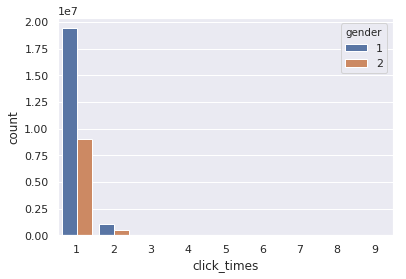

In [48]:
sns.set()
sns.countplot(x='click_times', hue='gender', data=df[df.click_times < 10])

## 测试数据信息

In [3]:
test_log = pd.read_csv('test/click_log.csv')
test_ad = pd.read_csv('test/ad.csv')

In [4]:
test_df = pd.merge(test_log, test_ad, how='left', on='creative_id')
test_df.head()

,time,user_id,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,20,3131989,645764,1,573314,58,2,14689,6
1,20,3131989,1027422,1,902764,129,2,42272,6
2,20,3131989,1106443,1,970829,2171,2,37513,322
3,20,3131989,629802,1,559183,\N,18,14678,26
4,59,3131989,2839769,1,2441288,129,2,35328,6


In [40]:
test_df.product_id.isnull().sum()

0

In [6]:
test_df.product_id = test_df.product_id.apply(process_nan)
test_df.industry = test_df.industry.apply(process_nan)

In [7]:
columns = ['product_category', 'advertiser_id']
for col in columns:
    test_df[col] = test_df[col].apply(lambda x: x-1)
test_df.head()

,time,user_id,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,20,3131989,645764,1,573314,58,1,14688,6
1,20,3131989,1027422,1,902764,129,1,42271,6
2,20,3131989,1106443,1,970829,2171,1,37512,322
3,20,3131989,629802,1,559183,0,17,14677,26
4,59,3131989,2839769,1,2441288,129,1,35327,6


In [8]:
test_df.shape

(33585512, 9)

In [9]:
test_df.sort_values(by=['user_id', 'time'], inplace=True)
test_df.head()

,time,user_id,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
31372842,3,3000001,351878,1,315858,0,17,7578,322
31372849,11,3000001,103064,1,93662,1794,1,13083,248
31372850,11,3000001,665090,1,589862,1701,1,6999,247
31372847,23,3000001,593698,1,527764,8938,2,9949,247
31372843,29,3000001,1508864,1,1312021,0,17,39178,322


In [13]:
from tqdm import tqdm

In [10]:
test_group = test_df.groupby('user_id')

In [15]:
for uid, df_user in tqdm(test_df.head().groupby('user_id')):
    values = df_user.values
    line = str(uid) + '\t' + '\t'.join(['_'.join(map(str, line[2:])) for line in values]) + '\n'
    print(line)

100%|██████████| 1/1 [00:00<00:00, 259.56it/s]

3000001	351878_1_315858_0_17_7578_322	103064_1_93662_1794_1_13083_248	665090_1_589862_1701_1_6999_247	593698_1_527764_8938_2_9949_247	1508864_1_1312021_0_17_39178_322



In [16]:
def save_group_new(group, path):
    with open(path, 'w') as f:
        for uid, df_user in tqdm(group):
            values = df_user.values
            line = str(uid) + '\t' + '\t'.join(['_'.join(map(str, line[2:])) for line in values]) + '\n'
            f.write(line)

In [17]:
save_group_new(test_group, 'online_group.csv')

100%|██████████| 1000000/1000000 [09:00<00:00, 1849.52it/s]


### 训练集和测试集uid有无交叉

In [43]:
set(df.user_id) & set(test_df.user_id)

set()

In [78]:
import torch
import torch.nn as nn

In [108]:
embed = nn.Embedding(10, 20)
embed

Embedding(10, 20)

In [114]:
embed(torch.LongTensor([[1, 2]])).shape

torch.Size([1, 2, 20])

In [190]:
x = torch.arange(24).view(2,3,4)

In [191]:
x

tensor([[[  0.,   1.,   2.,   3.],
         [  4.,   5.,   6.,   7.],
         [  8.,   9.,  10.,  11.]],

        [[ 12.,  13.,  14.,  15.],
         [ 16.,  17.,  18.,  19.],
         [ 20.,  21.,  22.,  23.]]])

In [192]:
mask = torch.LongTensor([[1,0,0],[1,1,0]])
mask

tensor([[ 1,  0,  0],
        [ 1,  1,  0]])

In [195]:
mask.repeat(2, 1)

tensor([[ 1,  0,  0],
        [ 1,  1,  0],
        [ 1,  0,  0],
        [ 1,  1,  0]])

In [ ]:
x = np.array([1,2])
y = np.array([3, 4])
z = np.array([x, y])
z

In [196]:
import torch.nn.functional as F

In [201]:
mask_data = mask.unsqueeze(2).repeat(1,1,3)
mask_data

tensor([[[ 1,  1,  1],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 0,  0,  0]]])

In [205]:
F.avg_pool1d(mask_data.float(), mask_data.size(2)).squeeze(2)

tensor([[ 1.,  0.,  0.],
        [ 1.,  1.,  0.]])

In [208]:
torch.mean(mask_data.float(), dim=1)

tensor([[ 0.3333,  0.3333,  0.3333],
        [ 0.6667,  0.6667,  0.6667]])

In [210]:
mask_data.float() * mask_data.float()

tensor([[[ 1.,  1.,  1.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 0.,  0.,  0.]]])

In [187]:
x = [(1,'x'), (2,3), (4, 5), 88, 0]
random.shuffle(x)

In [ ]:

for i in range(100000, 110000):
    flag = False
    for j in range(2, int(np.sqrt(i))):
        if i % j == 0:
            flag = True
            break
    if flag:
        continue
    else:
        print(i)
        break

In [1]:
import numpy as np

In [2]:
np.random.normal(loc=0.0, scale=1e-3, size=256)

array([ 2.55104349e-04,  8.62713636e-04, -1.02400917e-03,  1.14183722e-03,
       -2.93012188e-04, -6.65766825e-04,  7.34859049e-04, -7.91976293e-04,
       -7.37824227e-04, -2.25120565e-03,  1.93411040e-05, -1.23790679e-04,
       -3.48241368e-04,  1.22992425e-03, -1.60531691e-03, -4.47390227e-04,
        3.51668766e-04, -2.54016005e-04, -1.00929167e-03, -5.49969218e-04,
       -2.31294541e-05,  8.51985334e-04, -6.56967717e-04,  4.21017592e-04,
        1.35282306e-03,  1.25477179e-03, -3.90788800e-04, -5.63277352e-04,
        1.00683157e-03,  5.39388252e-04,  1.54469766e-03,  4.27861724e-04,
        2.64560818e-05,  6.61540293e-04,  2.85765664e-04,  1.44410382e-03,
       -5.22959954e-04, -1.29198185e-03, -1.16414513e-03, -2.01319327e-05,
       -5.85113996e-04, -1.43785185e-03,  4.10487285e-04,  2.76961118e-04,
        2.01996924e-03, -6.07636756e-05, -2.32101804e-04,  1.45356770e-03,
       -1.22859357e-04,  8.78970427e-04, -3.06122502e-03, -9.41195302e-04,
        2.83336623e-04, -